#Visualizing data from a Quantum Design Physical Property Measurement System

Quantum Design gives us a datafile in comma separated format. Generally we'd import this into Excel, select the columns we want, and then copy/paste the data into another data analysis environment where we then perform corrections and curve fitting to the data. We can streamline this process significantly using an iPython notebook, with the added benefit of improved transparency and tracking of our analysis. 

I recommend you start by installing the Anaconda Scientific Python distribution, which you can download for free at https://store.continuum.io/cshop/anaconda/. Once you've installed anaconda, open up a fresh iPython notebook and follow along!

To get started, we'll need to import three items:
    1) Pandas
    2) Matplotlib
    3) NumPy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We'll open our datafile using the pandas read_csv module, which allows us to specify where the column headers are in the datafile using the skip_rows argument:

In [2]:
data = pd.read_csv('exampleData.dat', skiprows=30)

'data' is now a pandas DataFrame, which contains columns of data that can be referenced by their labels. To verify that the import went as planned, we can look at the top few rows of the dataframe:

In [3]:
data.head()

,Comment,Time Stamp (sec),Temperature (K),Magnetic Field (Oe),Frequency (Hz),Amplitude (Oe),M-DC (emu),M-Std.Dev. (emu),M' (emu),M'' (emu),...,Map 20 (),Map 21 (),Map 22 (),Map 23 (),Map 24 (),Map 25 (),Map 26 (),Map 27 (),Map 28 (),Map 29 ()
0,NaN,2116401.96,1.990923,9999.475,NaN,NaN,0.006052,0.000092,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.990923,NaN,NaN,NaN,NaN
1,NaN,2116430.42,1.988199,9999.475,NaN,NaN,0.006092,0.000041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.988199,NaN,NaN,NaN,NaN
2,NaN,2116458.67,1.992494,9999.475,NaN,NaN,0.006082,0.000043,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.992494,NaN,NaN,NaN,NaN
3,NaN,2116597.94,2.024487,9999.475,NaN,NaN,0.006061,0.000041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.024487,NaN,NaN,NaN,NaN
4,NaN,2116721.92,3.033074,9999.475,NaN,NaN,0.005840,0.000042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.033074,NaN,NaN,NaN,NaN


We can plot the data in any column as a function of the index (first column), which is currently just the measurement number.

In [4]:
%matplotlib inline
# This 'magic' makes our plots show up as images in the notebook

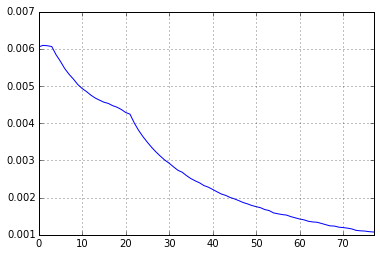

In [5]:
data['M-DC (emu)'].plot()

This looks strange. Ideally, we'd like to be able to plot things as a function of Temperature, not measurement number. We can do that by explicitly calling matplotlib:

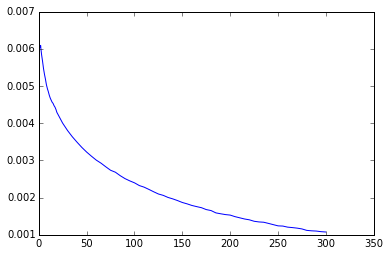

In [6]:
T_LABEL = 'Temperature (K)' ''
M_LABEL = 'M-DC (emu)'

plt.plot(data[T_LABEL], data[M_LABEL]) # plot M vs. T

That's more like it. Matplotlib has lots of cool functionality, and can be used to make some pretty nice plots (with some effort on your part to install fonts and set styles). The plot below will not look very nice, but it gives an example of few things you can do with matplotlib.

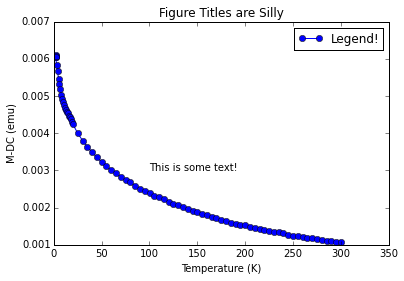

In [8]:
figure_title = 'Figure Titles are Silly'
figure_comment = 'This is some text!'

x_values = data[T_LABEL].values
y_values = data[M_LABEL].values

# point style: connected circles
# label the data
plt.plot(x_values, y_values, 'o-', label="Legend!") 
plt.xlabel(T_LABEL) # Set the x label
plt.ylabel(M_LABEL) # Set the y label
plt.text(100,0.003, figure_comment) # place text into the figure
plt.title(figure_title) # add a title (not recommended)

plt.legend()

#Curie-Weiss analysis of magnetic susceptibility data using scipy.optimize.curve_fit

Believe it or not, Python is good for more than just visualizing data. We'll use a curve fitting algorithm in two different ways to perform a Curie-Weiss analysis on the magnetization data contained in the .dat file we originally imported.

In [12]:
# make temperature, magnetization, and field into individual arrays for simplicity.

T = data[T_LABEL].values
M = data[M_LABEL].values

H_LABEL = 'Magnetic Field (Oe)'
H = data[H_LABEL].values

In [17]:
# example measurement parameters
mass = 0.1 # fample mass in grams
FW = 400.0 # formula weight of compound
nmol = mass/FW # calculated number of moles

In [18]:
Chi = M/(H*nmol) # magnetic Susceptibility

The magnetic susceptibility of paramagnetic materials is well described by the Curie-Weiss law, which you can google on your own. Let's build a function in accordance with the Curie-Weiss law that we can fit to our susceptibility data.

In [19]:
def curie_weiss_law(T, C, theta_W, Chi0):
    """C = curie constant
       theta_W = Weiss temperature
       Chi0 = temperature-independent susceptibility"""
    return C/(T-theta_W) + Chi0

We'll try to fit this function to our susceptibility data over the entire temperature range using scipy.optimize.curve_fit.

In [20]:
from scipy.optimize import curve_fit

In [23]:
popt, pcov = curve_fit(curie_weiss_law, T, Chi)

popt contains the optimized paramters in the order in which they appear in CW_law. pcov is the covariance matrix, which we'll use to extract the errors in the fitted parameter.

Let's have a look at the fit.

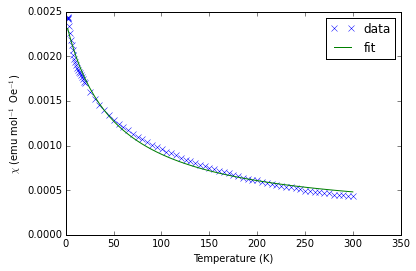

In [25]:
first_CW_fit = curie_weiss_law(T, popt[0], popt[1], popt[2])

plt.plot(T, Chi, 'x', label='data')
plt.plot(T, first_CW_fit, label='fit')

formatted_y_label = '$\chi$ (emu mol$^{-1}$ Oe$^{-1}$)'

plt.ylabel(formatted_y_label) # Set the y label
plt.xlabel(T_LABEL) # Set the x label
plt.legend()

Let's also look at the error in the fit

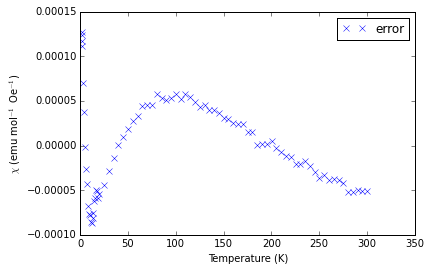

In [38]:
error1 = Chi-first_CW_fit

plt.plot(T, error1, 'x', label='error')
plt.ylabel(formatted_y_label) # Set the y label
plt.xlabel(T_LABEL) # Set the x label
plt.legend()

Even from a qualitative standpoint, we can see that the fit is not good. There is a small anomaly in the data around 15K that probably signifies some antiferromagnetic ordering, so we should only perform the fit to data at temperatures well above 15K. We can find an appropriate starting point for the fit using the np.argwhere function:

In [28]:
start_temp = 20.0 # Kelvin
START_INDEX = np.argwhere(T > start_temp)[0][0] 

np.argwhere returns an array of all indices for which T is greater that 20.0, 
but we only want the first value, so we grab element [0][0].

Now we can repeat the fit using our new lower bound.

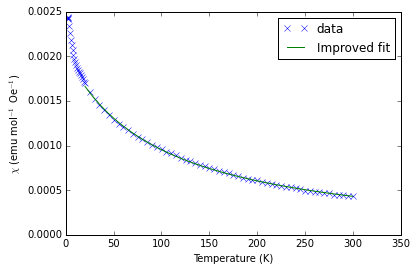

In [31]:
# Fit curie_weiss_law to experimental data, starting a start_temp
popt2, pcov2 = curve_fit(curie_weiss_law, T[START_INDEX:], Chi[START_INDEX:]) 

# compute the fit
second_fit = curie_weiss_law(T[START_INDEX:], popt2[0], popt2[1], popt2[2])

plt.plot(T, Chi, 'x', label='data')
plt.plot(T[START_INDEX:], second_fit, label='Improved fit')

plt.ylabel(formatted_y_label) # set the y label
plt.xlabel(T_LABEL) # set the x label

plt.legend()

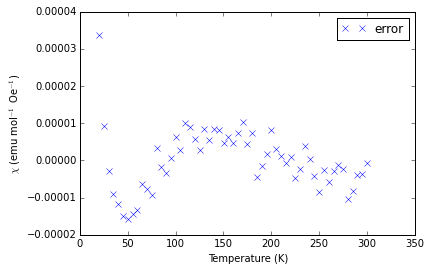

In [39]:
# view errors
error2 = Chi[START_INDEX:]-second_fit

plt.plot(T[START_INDEX:], error2, 'x', label='error')
plt.ylabel(formatted_y_label) # set the y label
plt.xlabel(T_LABEL) # set the x label
plt.legend()

Finally, let's make a plot with our data and our Curie-Weiss fit, and print the refined parameters.

Mu_eff = 1.272797(0.186728)
Weiss_theta = -96.648111(2.074951)
Chi_0 = -0.000083(0.000010)


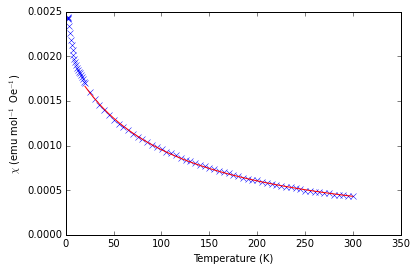

In [82]:
# standard deviation of refined parameters is found by 
#computing the square root of the covariance matrix
perr2 = np.sqrt(np.diag(pcov2))

Mu_eff = 2.82*np.sqrt(popt2[0])
Mu_eff_err = 2.82*np.sqrt(perr2[0])
Weiss_theta = popt2[1]
Weiss_theta_err = perr2[1]
Chi_0 = popt2[2]
Chi_0_err = perr2[2]

plt.plot(T, Chi, 'x', color = 'blue', label='data')
plt.plot(T[START_INDEX:], second_fit, color='red')
    
plt.ylabel(formatted_y_label) # set the y label
plt.xlabel(T_LABEL) # set the x label

print 'Mu_eff = %f(%f)' % (Mu_eff, Mu_eff_err)
print 'Weiss_theta = %f(%f)' % (Weiss_theta, Weiss_theta_err)
print 'Chi_0 = %f(%f)' % (Chi_0, Chi_0_err)

I'll now quickly run through how one might perform a Curie-Weiss fit to the inverse susceptibility data, with Chi_0 as a manually-varied parameter, rather than a refined parameter.

In [54]:
def CW_inv_fit(T, C, theta_W):
    return T/C - theta_W/C

Mu_eff = 1.267689(0.073271)
Weiss_theta = -94.631394(0.894516)


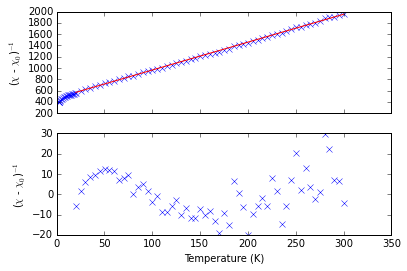

In [84]:
chi0_guess = -0.000083 #Change this value manually

popt3, pcov3 = curve_fit(CW_inv_fit, T[START_INDEX:], 
                         1/(Chi[START_INDEX:]-chi0_guess))
# compute fit
third_fit = CW_inv_fit(T[START_INDEX:], popt3[0], popt3[1])
# statistical errors
perr3 = np.sqrt(np.diag(pcov3))

Mu_eff = 2.82*np.sqrt(popt3[0])
Mu_eff_err = 2.82*np.sqrt(perr3[0])
Weiss_theta = popt3[1]
Weiss_theta_err = perr3[1]

f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(T, 1/(Chi-chi0_guess), 'x')
ax1.plot(T[START_INDEX:], third_fit, color='red')
ax1.set_ylabel('($\chi$ - $\chi_0$)$^{-1}$') #Set the y label

# view errors
error3 = 1/(Chi[START_INDEX:]-chi0_guess)-third_fit

ax2.plot(T[START_INDEX:], error3, 'x')
ax2.set_ylabel('($\chi$ - $\chi_0$)$^{-1}$') #Set the y label
ax2.set_xlabel(T_LABEL) #Set the x label

print 'Mu_eff = %f(%f)' % (Mu_eff, Mu_eff_err)
print 'Weiss_theta = %f(%f)' % (Weiss_theta, Weiss_theta_err)

You can play with the value of Chi0_guess in the cell above to convince yourself that there is a wide range of Chi0 values that will give a good fit, but with significantly different values for mu_eff and theta_w. For this reason, it is sometimes better to refine Chi0 as we did earlier in this tutorial. Either way, you now have the tools necessary to visualize physical properties data and perform Curie-Weiss fitting using the iPython notebook!